# ANN

In [1]:
# path to files
a = 'C:/Users/user/Desktop/Deep Learnin/31 Artificial Neural Networks/'
b = 'ANN DATA/Artificial_Neural_Networks/Churn_Modelling.csv'
data_file_path = a + b
data_file_path

'C:/Users/user/Desktop/Deep Learnin/31 Artificial Neural Networks/ANN DATA/Artificial_Neural_Networks/Churn_Modelling.csv'

In [2]:
# libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
data = pd.read_csv(data_file_path)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
X = data.iloc[:, 3:-1].values


In [5]:
#label enconder
labend = LabelEncoder()
onehot = OneHotEncoder(sparse=False)
ss = StandardScaler()
data_2 = data.iloc[:, 3:]
for col in data_2.columns:
    if data_2[col].dtype == 'O':
        data_2[col] = labend.fit_transform(data_2[col])
X_enc = data_2.iloc[:,:-1].values
X_enc.shape

(10000, 10)

In [6]:
# to one hot label encoder
x_geo = onehot.fit_transform(data_2[['Geography']])
print(x_geo.shape)
xx = pd.concat([data_2,pd.DataFrame(x_geo, columns=['geo1', 'geo2', 'geo3'])],axis =1)
print(xx.shape)

(10000, 3)
(10000, 14)


In [7]:
x_= xx.drop(columns=['Geography','geo1','Exited'])
x_

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,geo2,geo3
0,619,0,42,2,0.00,1,1,1,101348.88,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1.0,0.0


In [8]:
y_data = data_2["Exited"].values
x_data = x_.iloc[:,:]

In [9]:
# splitting data to test and train
x_train,x_test,y_train, y_test = train_test_split(x_data,y_data,test_size = .20, shuffle= True)

<AxesSubplot:xlabel='Geography', ylabel='Tenure'>

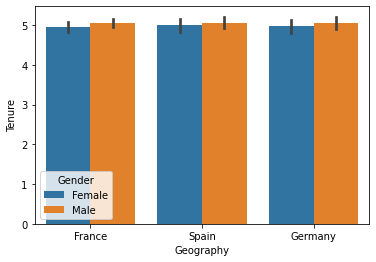

In [10]:
sns.barplot(x = "Geography",y = "Tenure", data = data, hue = "Gender")

<AxesSubplot:>

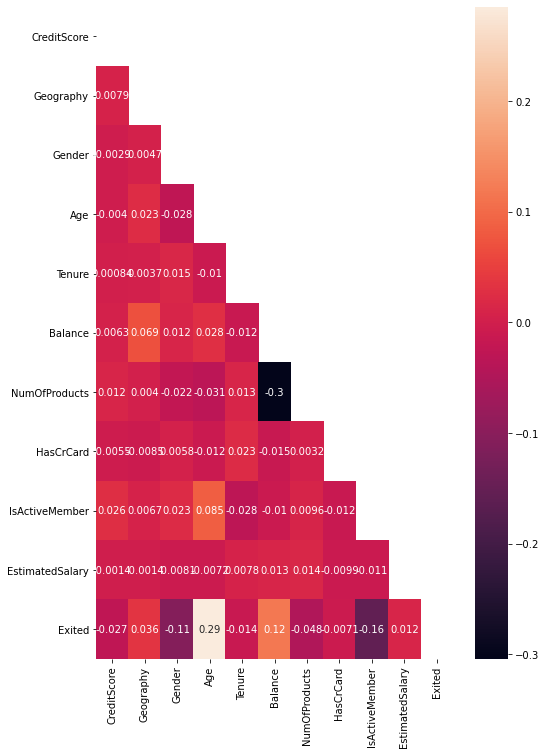

In [11]:
# correlation matrix for multicolinearity
corr = data_2.corr(method='pearson')
#print(corr)
np_corr = np.triu(corr)
plt.figure(figsize=[8,12])
sns.heatmap(corr, mask = np_corr , annot= True,  )

In [12]:
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit(x_test)

# Model

In [13]:
from keras.models import Sequential, Model
from keras.layers import Dense,InputLayer, Input
from keras.optimizers import Optimizer
import tensorflow as tf
from tensorflow import keras

In [14]:
classifier = Sequential()

input_layer = InputLayer(input_shape= (11,))
classifier.add(input_layer)

dense_layer_1 = Dense(6, kernel_initializer='uniform', activation = 'relu',)
classifier.add(dense_layer_1)

dense_layer_2 = Dense(6,activation = 'relu',kernel_initializer='uniform')
classifier.add(dense_layer_2)

output_layer = Dense(1, activation = 'sigmoid', kernel_initializer='uniform')
classifier.add(output_layer)

#optimization = tf.keras.optimizers.Adam()
classifier.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [15]:
classifier.fit(x_train_ss,y_train,batch_size = 10, epochs = 100 )

Epoch 1/100
800/800 [==============================] - 30s 1ms/step - loss: 0.5738 - accuracy: 0.7964
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4130 - accuracy: 0.8001: 0s - loss: 0.4093 - ac
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4226 - accuracy: 0.7897
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8200
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4166 - accuracy: 0.8276
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4085 - accuracy: 0.8393
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.8362
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4033 - accuracy: 0.8398
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4005 - accuracy: 0.8328
Epoch 10/100
800/800 [==============================] - 1s 1ms/ste

800/800 [==============================] - 1s 1ms/step - loss: 0.3466 - accuracy: 0.8563
Epoch 81/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3354 - accuracy: 0.8626
Epoch 82/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3424 - accuracy: 0.8626
Epoch 83/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3462 - accuracy: 0.8611
Epoch 84/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3387 - accuracy: 0.8601
Epoch 85/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3298 - accuracy: 0.8676
Epoch 86/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3632 - accuracy: 0.8515
Epoch 87/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3369 - accuracy: 0.8618
Epoch 88/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3457 - accuracy: 0.8591
Epoch 89/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3523 - accuracy: 

In [21]:
from collections import Counter
y_pred = classifier.predict(x_test)


Counter({0.0: 1991,
         3.4976212e-37: 1,
         7.558688e-37: 1,
         2.3599155e-18: 1,
         1.8856695e-34: 1,
         1.7870703e-38: 1,
         3.2133023e-19: 1,
         2.913032e-38: 1,
         2.9485975e-22: 1,
         1.4198436e-32: 1})

In [88]:
from sklearn.metrics import confusion_matrix, classification_report

In [89]:
confusion_matrix(y_test,y_pred)

array([[1600,    0],
       [ 400,    0]], dtype=int64)